In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pypfopt import EfficientSemivariance, EfficientCVaR, EfficientCDaR, HRPOpt
from pypfopt import risk_models
from pypfopt import expected_returns
from collections import OrderedDict


sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

In [3]:
ANO = 2019

In [4]:
dados_acoes = pd.read_csv("dados_acoes.csv").set_index("Date")
dados_acoes = dados_acoes[f"{ANO}-01-01":"2021-07-13"].fillna(method="ffill")
dados_acoes.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BOVA11,BRML3,CIEL3,CMIG4,...,LAME4,LREN3,MGLU3,MULT3,PETR4,PRIO3,UGPA3,USIM5,VALE3,VVAR3
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,15.258595,8.481046,42.239235,22.016506,27.039375,23.512794,87.900002,12.521657,8.763200,10.641972,...,19.130808,37.888344,5.641579,24.063623,22.526630,2.0712,25.573843,9.451055,44.829338,4.38
2019-01-03,15.428659,8.850316,42.413063,22.476667,27.312134,23.770172,88.000000,12.605382,8.553904,10.418713,...,19.072599,37.409847,5.581216,24.237436,23.079029,2.0758,25.098511,9.247702,42.995453,4.31
2019-01-04,15.636516,8.529873,42.413063,21.984024,27.097815,23.537703,88.500000,12.363507,9.236394,10.314527,...,18.830070,35.974354,5.411354,23.744965,23.144567,2.0932,24.929083,9.789974,45.794544,4.27
2019-01-07,15.570379,8.484097,42.134941,22.168762,27.419289,23.188993,88.480003,12.289084,9.154496,10.009407,...,19.458136,35.147854,5.495374,23.406992,23.509716,2.0914,24.166668,9.809342,45.548859,4.24
2019-01-08,15.258595,8.508512,41.656933,22.415087,27.586721,22.848591,88.830002,12.307691,8.845098,9.957314,...,19.487350,36.278854,5.451088,23.242832,23.369276,2.1414,23.766638,9.535276,45.987583,4.04


In [5]:
dados_cripto = pd.read_csv("dados_criptos.csv").set_index("Date")
dados_cripto = dados_cripto[f"{ANO}-01-01":"2021-07-13"].fillna(method="bfill")
dados_cripto.head()

,ADA-USD,BCH-USD,BNB-USD,BTC-USD,DCR-USD,DOGE-USD,EOS-USD,ETC-USD,ETH-USD,FIL-USD,...,NEO-USD,REP-USD,THETA-USD,TRX-USD,VET-USD,WAVES-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.042547,164.854599,6.075273,3843.520020,17.464001,0.002392,2.663533,5.227261,140.819412,3.016652,...,7.866171,8.195203,0.049690,0.019561,0.004145,3.162524,0.115930,48.367496,0.364771,0.474699
2019-01-02,0.045258,171.827377,6.188613,3943.409424,18.415791,0.002407,2.887629,5.438700,155.047684,3.344247,...,8.076462,8.868501,0.050489,0.020222,0.004231,3.153164,0.119331,52.252449,0.375243,0.485319
2019-01-03,0.042682,162.049927,5.903535,3836.741211,18.236917,0.002360,2.681411,5.094617,149.135010,3.337603,...,7.679240,8.638993,0.052906,0.020088,0.004051,3.103900,0.113825,49.815357,0.360224,0.482134
2019-01-04,0.043812,161.395630,6.065138,3857.717529,18.562626,0.002315,2.721645,5.254148,154.581940,3.461010,...,7.634589,9.245858,0.051363,0.021492,0.004094,3.086819,0.115361,50.630875,0.356747,0.483029
2019-01-05,0.044701,160.401215,6.065543,3845.194580,18.490410,0.002319,2.699468,5.136273,155.638596,3.208686,...,7.844755,9.298466,0.050197,0.022294,0.004074,3.073536,0.114046,49.931812,0.355275,0.483224


In [6]:
dados = dados_acoes.join(dados_cripto)
dados.head()

,ABEV3,B3SA3,BBAS3,BBDC3,BBDC4,BBSE3,BOVA11,BRML3,CIEL3,CMIG4,...,NEO-USD,REP-USD,THETA-USD,TRX-USD,VET-USD,WAVES-USD,XLM-USD,XMR-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,15.258595,8.481046,42.239235,22.016506,27.039375,23.512794,87.900002,12.521657,8.763200,10.641972,...,8.076462,8.868501,0.050489,0.020222,0.004231,3.153164,0.119331,52.252449,0.375243,0.485319
2019-01-03,15.428659,8.850316,42.413063,22.476667,27.312134,23.770172,88.000000,12.605382,8.553904,10.418713,...,7.679240,8.638993,0.052906,0.020088,0.004051,3.103900,0.113825,49.815357,0.360224,0.482134
2019-01-04,15.636516,8.529873,42.413063,21.984024,27.097815,23.537703,88.500000,12.363507,9.236394,10.314527,...,7.634589,9.245858,0.051363,0.021492,0.004094,3.086819,0.115361,50.630875,0.356747,0.483029
2019-01-07,15.570379,8.484097,42.134941,22.168762,27.419289,23.188993,88.480003,12.289084,9.154496,10.009407,...,8.471042,9.395186,0.051540,0.023601,0.004176,2.951987,0.123220,52.826897,0.364347,0.481431
2019-01-08,15.258595,8.508512,41.656933,22.415087,27.586721,22.848591,88.830002,12.307691,8.845098,9.957314,...,9.175762,10.048374,0.050526,0.026336,0.004382,2.887409,0.123119,53.155445,0.365315,0.484993


In [7]:
def gera_portfolio(dados_precos, tipo='semivariancia'):
  in_sample, out_sample = dados_precos[:"2021-01-01"], dados_precos["2021-01-01":]

  mu = expected_returns.mean_historical_return(in_sample)
  historical_returns = expected_returns.returns_from_prices(in_sample)

  if tipo == 'semivariancia':
    es = EfficientSemivariance(mu, historical_returns)
    raw_weights = es.min_semivariance()
  elif tipo =='cvar':
    es = EfficientCVaR(mu, historical_returns)
    raw_weights = es.min_cvar()
  elif tipo == 'cdar':
    es = EfficientCDaR(mu, historical_returns)
    raw_weights = es.min_cdar()
  elif tipo =='hrp':
    es = HRPOpt(historical_returns)
    es.optimize()
    raw_weights = es.clean_weights()
  else:
    raise ValueError("Tipo de portfólio não encotrado!")

  raw_weights = np.asarray([weight for weight in raw_weights.values()])
  es.portfolio_performance(verbose=True)
  return es.clean_weights(), raw_weights, out_sample

In [18]:
from riskfolio import RiskFunctions

def portfolio_metrics(price_data, tipo='semivariancia', rf=0.0575, frequency=252):
  mu = expected_returns.mean_historical_return(price_data.to_frame()).iloc[0]
  returns = price_data.pct_change().dropna()

  if tipo == 'semivariancia':
    drops = np.fmin(returns, 0)
    semivariance = np.sum(np.square(drops)) / returns.shape[0] * frequency
    semi_deviation = np.sqrt(semivariance)
    sortino_ratio = (mu - rf) / semi_deviation

    print("Expected annual return: {:.1f}%".format(100 * mu))
    print("Annual semi-deviation: {:.1f}%".format(100 * semi_deviation))
    print("Sortino Ratio: {:.2f}".format(sortino_ratio))

  elif tipo == 'cvar':
    alpha = 0.95
    var = np.percentile(returns, 100 * (1-alpha))
    cvar_val = np.mean(returns[returns < var])

    print("Expected annual return: {:.1f}%".format(100 * mu))
    print("Conditional Value at Risk: {:.2f}%".format(100 * cvar_val))
  
  elif tipo == 'cdar':
    cdar_val = RiskFunctions.CDaR_Rel(returns)
    print("Expected annual return: {:.1f}%".format(100 * mu))
    print("Conditional Drawdown at Risk: {:.2f}%".format(100 * cdar_val))

  elif tipo == 'hrp':
    actual_return = (price_data.iloc[-1]-price_data.iloc[0])/price_data.iloc[0]
    sd_p = math.sqrt(risk_models.sample_cov(price_data.to_frame()).iloc[0][0])
    
    print(f"Actual return: {actual_return:.2%}")
    print(f"Expected annual return: {mu:.2%}")
    print(f"Annual volatility: {sd_p:.2%}")
    print(f"Sharpe ratio: {(mu-rf)/sd_p:.2f}")
    
  else:
    raise ValueError("Tipo de portfólio não encotrado!")

Expected annual return: 40.9%
Annual volatility: 33.8%
Sharpe Ratio: 1.15


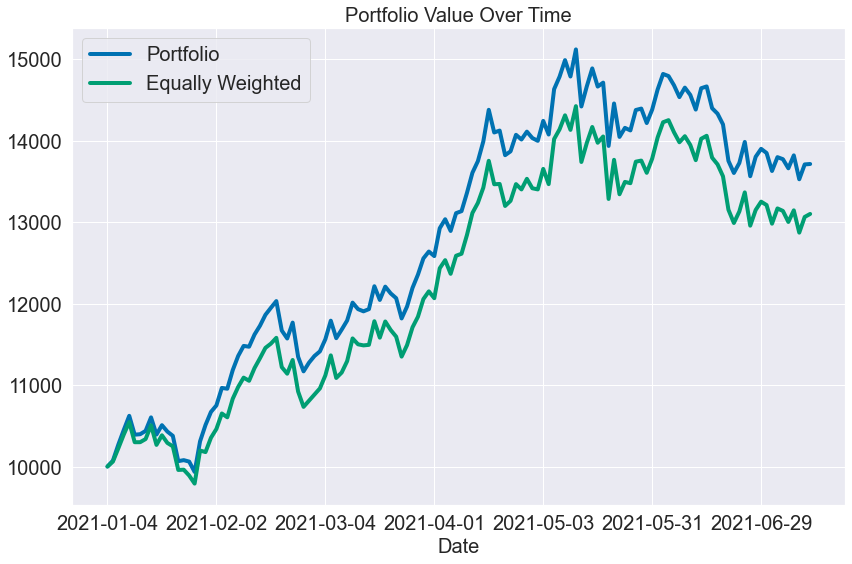

In [9]:
C = 10_000
raw_weights, portfolio_weights, out_sample = gera_portfolio(dados, 'hrp')
backtest_range = out_sample.index
out_sample_returns = out_sample.pct_change().dropna()



if "BTC-USD" in out_sample_returns.columns and len(portfolio_weights) != 25:
  stock_proportion = 1 - portfolio_weights[-25:].sum()
  equal_stocks = np.repeat(stock_proportion/len(dados_acoes.columns), len(dados_acoes.columns))
  equal_crypto = np.repeat((1 - stock_proportion)/len(dados_cripto.columns), len(dados_cripto.columns))
  equal_weights = np.concatenate((equal_stocks, equal_crypto))
else:
  equal_weights = np.ones_like(out_sample.columns) / len(out_sample.columns)

capital = [(C, C)]

for _, row in out_sample_returns.iterrows():
  portofolio_return, equal_return = np.dot(portfolio_weights, row), np.dot(equal_weights, row)

  C_portfolio, C_equal = capital[-1][0] * (1+portofolio_return), capital[-1][1] * (1+equal_return)
  capital.append((C_portfolio, C_equal))
  

backtest_df = pd.DataFrame(capital, index=backtest_range, columns=["Portfolio", "Equally Weighted"])
backtest_df.plot()
plt.title("Portfolio Value Over Time")
plt.tight_layout()

In [19]:
portfolio_metrics(backtest_df['Portfolio'], 'hrp')

Actual return: 37.13%
Expected annual return: 85.30%
Annual volatility: 26.12%
Sharpe ratio: 3.05


In [20]:
def plot_weights(raw_weights):
  new_weights = OrderedDict()
  for ticker in raw_weights:
    if raw_weights[ticker] != 0:
      new_weights[ticker] = raw_weights[ticker]

  pd.Series(new_weights).plot.barh()
  plt.title("Portfolio Composition")
  plt.xlabel("Proportion")
  plt.tight_layout()

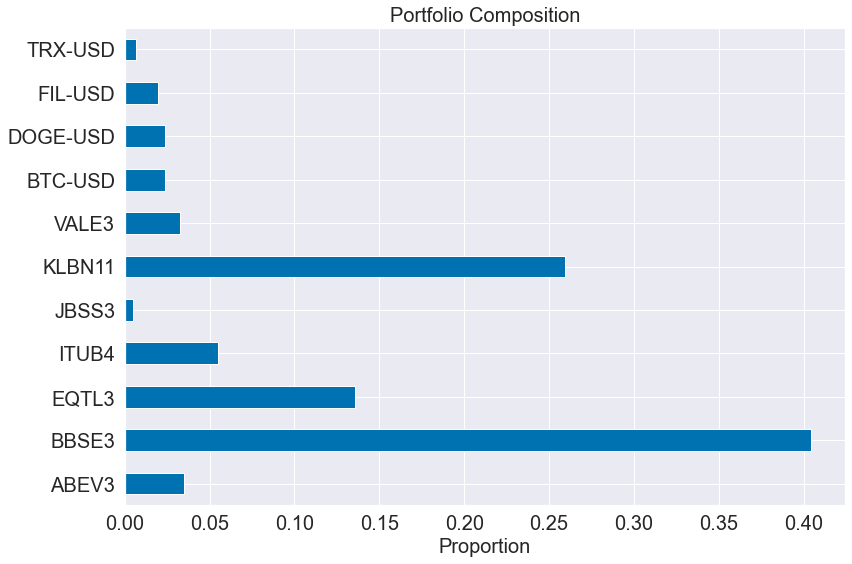

In [21]:
plot_weights(raw_weights)